<a href="https://colab.research.google.com/github/MicheleCucchiaro/Machine-learning-project/blob/main/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart failure prediction
The goal of this project is to predict the occurrence of heart diseases in patients based on their clinical features.

In [ ]:
!pip install flaml[automl]
!pip install "numpy<2.0" --upgrade

In [ ]:
#importing the necessary libraries for the project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


df = pd.read_csv("https://raw.githubusercontent.com/MicheleCucchiaro/Machine-learning-project/main/heart.csv", delimiter = ",")
df



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#Data understanding


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## Dataset description
**Age:** Age of the patient (years)

**Sex:** Sex of the patient (M: male, F: female)

**ChestPainType:** chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

**RestingBP:** resting blood pressure (mm Hg)

**Cholesterol:** serum colesterol (mm/d)

**FastingBS:** fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)

**RestingECG:** resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)

**MaxHR:** maximum heart rate achieved (Numeric value between 60 and 202)

**ExerciseAngina:** ExerciseAngina: exercise-induced angina (Y: Yes, N: No)

**Oldpeak:** oldpeak = ST (Numeric value measured in depression)

**ST_Slope:** the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)

**HeartDisease:** output class (1: heart disease, 0: Normal)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are no null values present in the dataset

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


<Axes: xlabel='HeartDisease', ylabel='count'>

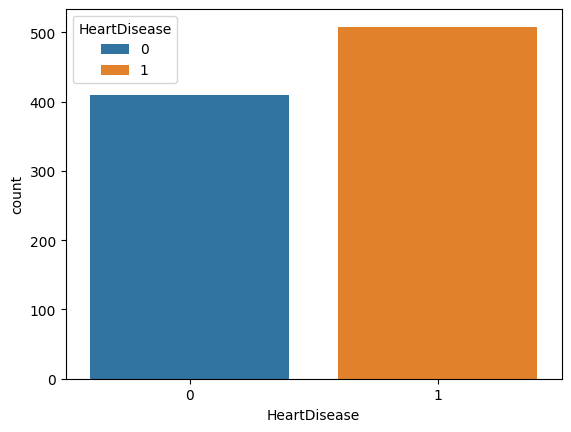

In [ ]:
sns.countplot(data=df, x='HeartDisease', hue='HeartDisease')

##Checking the non-numerical data, understanding how they are composed

In [ ]:
df["RestingECG"].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [ ]:
df["ST_Slope"].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [ ]:
df["ChestPainType"].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [ ]:
seed = 33
from flaml import AutoML
X_train, X_test, y_train, y_test = train_test_split(df.drop("HeartDisease", axis=1), df["HeartDisease"], test_size=0.3)

automl = AutoML()
settings = {
    "time_budget": 60,
    "metric": 'accuracy',
    "task": 'classification',
    "seed": seed
}
automl.fit(X_train=X_train, y_train=y_train, **settings)
y_pred = automl.predict(X_test)

In [ ]:
automl.model.estimator


In [ ]:
metrics.accuracy_score(y_test, y_pred)


#Encoding

In [ ]:
#mapping the "ExerciseAngina" and "Sex" column to numeric

df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

#one-hot encoding the "ChestPainType" column and adding it to the dataset, while dropping the original column

chest_pain_dummies = pd.get_dummies(df["ChestPainType"], prefix='ChestPainType')
df = pd.concat([df, chest_pain_dummies], axis=1)
df = df.drop("ChestPainType", axis=1)

#one-hot encoding the "ST_Slope" column and adding it to the dataset, while dropping the original column

ST_Slope_dummies = pd.get_dummies(df["ST_Slope"], prefix='ST_Slope')
df = pd.concat([df, ST_Slope_dummies], axis=1)
df = df.drop("ST_Slope", axis=1)

#one-hot encoding the "RestingECG" column and adding it to the dataset, while dropping the original column

RestingECG_dummies = pd.get_dummies(df["RestingECG"], prefix='RestingECG')
df = pd.concat([df, RestingECG_dummies], axis=1)
df = df.drop("RestingECG", axis=1)

df


In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

**Cholesterol** has a bimodal data distribution (has to be fixed since the 0 values are not physiologically possible, therfore they should be treated as missing values)

**Age** has a slighly skewed to the left

**Oldpeak** is skewed to the right

In [ ]:
#Replacing the 0 values with the mean
mean_chol = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()
df['Cholesterol'] = df['Cholesterol'].replace(0, mean_chol)
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
sns.pairplot(df, hue='HeartDisease', markers='.')
plt.show()

In [ ]:
rho = df.corr(method='pearson', numeric_only=True)
rho = rho.drop(index='HeartDisease', columns='HeartDisease')
min_corr = 0.4
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(8, 6))
sns.heatmap(kot, cmap=sns.color_palette("coolwarm", as_cmap=True))
kot

There are no highly correlated values, therefore we should not drop any of them.

Selecting the variables that will be used fo the prediction

In [ ]:
prediction_var = ["Age", "Sex", "ExerciseAngina", "Oldpeak", "ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA", "ChestPainType_ASY","Cholesterol","FastingBS","RestingECG_Normal","RestingECG_ST","RestingECG_LVH","ST_Slope_Up","ST_Slope_Flat","ST_Slope_Down"]

In [ ]:
def set_dataset(feature_list, normalize=False):
    X = df[feature_list + ["HeartDisease"]].drop('HeartDisease', axis=1)
    y = df['HeartDisease']
    if normalize: X = (X - X.mean()) / X.std()
    print(f"X.shape: {X.shape}, y.shape: {y.shape}")
    return X, y

X, y = set_dataset(prediction_var, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(f"y_train.shape: {X.shape}, y_train.shape: {y_train.shape}")

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X_train)

plt.scatter(
    x=result[:,0],
    y=result[:,1] ,
    c=y_train,
    cmap='viridis'
)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=seed)
result = tsne.fit_transform(X_train)

plt.scatter(
    x=result[:,0],
    y=result[:,1],
    c=y_train,
    cmap='viridis'
)

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=seed)
clf.fit(X_train)
is_outlier = clf.predict(X_train)

plt.scatter(
    x=result[:,0],
    y=result[:,1],
    s=[10 if x > 0 else 40 for x in is_outlier],
    c=is_outlier,
    cmap='viridis'
)

## Outliers

In [ ]:
import plotly.express as px
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [ ]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [ ]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [ ]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [ ]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

In [ ]:
outlier_labels = y_train[is_outlier == -1]
plt.figure(figsize=(3, 2.5))
outlier_labels.hist()

**The majority of the outliers are related to subjects that present a heart disease, therefore we should not drop them.**

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(random_state=seed)  # all parameters not specified are set to their defaults
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

## K-nearest neighbours

In [ ]:
from sklearn.metrics import confusion_matrix
def fit_knn(X_train, y_train, X_test, y_test):
    k_range = list(range(1, 30))
    scores = []
    conf_matrix = None
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
        if k == 1: conf_matrix = confusion_matrix(y_test, y_pred)
    fig, axes = plt.subplots(1, 2, figsize=(8, 2.5))
    if conf_matrix is not None:
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
        axes[0].set_xlabel('Predicted labels')
        axes[0].set_ylabel('True labels')
        axes[0].set_title('Confusion Matrix (k=1)')
    axes[1].plot(k_range, scores, marker='o', linestyle='-', color='b')
    axes[1].set_xlabel('Value of k for KNN')
    axes[1].set_ylabel('Accuracy Score')
    axes[1].grid(True)
    fig.tight_layout()
    return y_pred
p = fit_knn(X_train, y_train, X_test, y_test)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def fit_forest(X_train, y_train, X_test, y_test):
    model=RandomForestClassifier(n_estimators=100, random_state=seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {metrics.accuracy_score(y_pred, y_test)}")
    featimp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\nFeatures sorted by descending importance:")
    print(featimp)

fit_forest(X_train, y_train, X_test, y_test)

In [ ]:
def auto_ml(max_iter=300):
    automl = AutoML()
    settings = {
        "time_budget": -1,
        "max_iter": max_iter,
        "metric": 'accuracy',
        "task": 'classification',
        "seed": seed
    }
    automl.fit(X_train=X_train, y_train=y_train, **settings)
    y_pred = automl.predict(X_test)
    return automl, y_pred

automl, y_pred = auto_ml(200)

In [ ]:
automl.model.estimator

In [ ]:
metrics.accuracy_score(y_test, y_pred)

## Cross-validation score

In [ ]:
from sklearn.model_selection import cross_val_score
def cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=5)
    print("Scores: " + str(scores))
    print("%0.3f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cv(RandomForestClassifier(n_estimators=100, random_state=seed), X, y)

## Hyperparameter optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV

def gridsearch_cv(model,param_grid, X_train, y_train):
    clf = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=2)
    clf.fit(X_train, y_train)
    print(f"The best score is {clf.best_score_}, with parameters {clf.best_params_}")
    return clf.best_estimator_

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 30, 3)),
    'leaf_size': list(range(1, 30, 3))
}
gridsearch_cv(KNeighborsClassifier(), param_grid, X, y)

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    "random_state": [seed]
}
clf = gridsearch_cv(RandomForestClassifier(), param_grid, X, y)
clf

## Feature selection

In [ ]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring="accuracy", min_features_to_select=1, n_jobs=2, verbose=1)
rfecv.fit(X, y)
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Feature ranking: {rfecv.ranking_}")
print(f"Selected features: {list(X.columns[rfecv.support_])}")

In [ ]:
cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure(figsize=(3, 2.5))
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(x=cv_results["n_features"], y=cv_results["mean_test_score"], yerr=cv_results["std_test_score"],)
plt.title("Recursive Feature Elimination")

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(clf, n_features_to_select=6, step=1)
rfe = rfe.fit(X, y)
print(f"Selected features:\n{sorted(X.columns[rfe.support_])}")
print(f"... vs the features we have manually selected:\n{sorted(prediction_var)}")

## Scikit-learn piepelines

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([               # Create a pipeline with scaling and SVC
    ('scaler', StandardScaler()),   # Step 1: Scale the features
    ('svc', SVC())                  # Step 2: Apply Support Vector Classifier
])

param_grid = {                                  # Define the parameter grid to search
    'scaler__with_mean': [True, False],         # Different values of with_mean for StandardScaler
    'svc__C': [0.1, 1, 10],                     # Different values of C for SVC
    'svc__kernel': ['linear', 'rbf', 'poly'],   # Different kernel functions for SVC
    'svc__random_state': [seed]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_
y_pred = grid_search.predict(X_test)
print(f"The best score is {grid_search.best_score_}, with parameters {grid_search.best_params_}")
grid_search.best_estimator_

## Auto-ML

In [ ]:
def auto_ml(max_iter=300):
    automl = AutoML()
    settings = {
        "time_budget": -1,  # in seconds (-1 = unlimited)
        "max_iter": max_iter,  # maximum iterations of the search
        "metric": 'accuracy',
        "task": 'classification',
        "seed": seed
    }
    automl.fit(X_train=X_train, y_train=y_train, **settings)  # Search for the best model and hyperparameters
    y_pred = automl.predict(X_test)  # Make predictions on the test set
    return automl, y_pred

automl, y_pred = auto_ml(300)

In [ ]:
automl.model.estimator

In [ ]:
metrics.accuracy_score(y_test, y_pred)